In [144]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns 
import math
import sklearn

df = pd.read_csv("//Users/owner/ITCS_3162/ITCS3162/Project3/World military power.csv")


In [145]:
df = pd.read_csv('World military power.csv')

df.drop('Unnamed: 4', axis = 1, inplace = True)
df.drop('Unnamed: 5', axis = 1, inplace = True)
df.drop('Unnamed: 6', axis = 1, inplace = True)
df.drop('Unnamed: 8', axis = 1, inplace = True)
df.drop('Unnamed: 9', axis = 1, inplace = True)
df.drop('Unnamed: 10', axis = 1, inplace = True)
df.drop('Unnamed: 11', axis = 1, inplace = True)
df.drop('Unnamed: 12', axis = 1, inplace = True)
df.drop('Unnamed: 13', axis = 1, inplace = True)
df.drop('Unnamed: 14', axis = 1, inplace = True)
df.drop('Land Strength', axis = 1, inplace = True)
df.drop('Unnamed: 18', axis = 1, inplace = True)
df.drop('Airforce Strength', axis = 1, inplace = True)
df.drop('Unnamed: 7', axis = 1, inplace = True)
df.drop('Unnamed: 15', axis = 1, inplace = True)
df.drop('Unnamed: 19', axis = 1, inplace = True)
df.drop('Unnamed: 20', axis = 1, inplace = True)
df.drop('Unnamed: 21', axis = 1, inplace = True)
df.drop('Unnamed: 23', axis = 1, inplace = True)
df.drop('Unnamed: 24', axis = 1, inplace = True)
df.drop('Unnamed: 22', axis = 1, inplace = True)
df.drop('Unnamed: 25', axis = 1, inplace = True)
df.drop('Navy Strength', axis = 1, inplace = True)
df.drop('Unnamed: 28', axis = 1, inplace = True)
df.drop('Unnamed: 29', axis = 1, inplace = True)
df.drop('Unnamed: 30', axis = 1, inplace = True)
df.drop('Unnamed: 31', axis = 1, inplace = True)
df.drop('Unnamed: 32', axis = 1, inplace = True)
df.drop('Unnamed: 33', axis = 1, inplace = True)
df.drop('Unnamed: 34', axis = 1, inplace = True)
df.drop('Unnamed: 35', axis = 1, inplace = True)
df.drop('Finances', axis = 1, inplace = True)
df.drop('Unnamed: 38', axis = 1, inplace = True)
df.drop('Unnamed: 39', axis = 1, inplace = True)
df.drop('Logistics', axis = 1, inplace = True)
df.drop('Unnamed: 41', axis = 1, inplace = True)
df.drop('Natural resources', axis = 1, inplace = True)
df.drop('Unnamed: 44', axis = 1, inplace = True)
df.drop('Unnamed: 45', axis = 1, inplace = True)
df.drop('Unnamed: 46', axis = 1, inplace = True)
df.drop('Unnamed: 50', axis = 1, inplace = True)
df.drop('Unnamed: 51', axis = 1, inplace = True)
df.drop('Manpower', axis = 1, inplace = True)
df.drop('Geography', axis = 1, inplace = True)
df.drop('Unnamed: 53', axis = 1, inplace = True)
df.drop('Unnamed: 54', axis = 1, inplace = True)
df.drop('Unnamed: 55', axis = 1, inplace = True)
df.drop('Unnamed: 56', axis = 1, inplace = True)
df.drop('Unnamed: 57', axis = 1, inplace = True)
df.drop('Unnamed: 58', axis = 1, inplace = True)
df.drop('Unnamed: 59', axis = 1, inplace = True)
df.drop('Unnamed: 43', axis = 1, inplace = True)
df = df.rename(columns={'Unnamed: 1': 'Overall Strength Index', 'Unnamed: 3': 'Aircraft Power', 'Unnamed: 17': 'Land Assets', 'Unnamed: 27': 'Navy Fleet Strength','Unnamed: 37': 'Defense Budget', 'Unnamed: 47': 'Natural Resources','Unnamed: 49': 'Manpower' })
rows_to_drop = [0,67, 109, 116, 105, 16,93, 64, 42, 24, 81, 89, 37, 70, 77, 82, 34, 38, 66, 112, 79,2 , 85, 94, 75, 6, 48, 122, 17, 21, 76, 45, 86, 65, 14,22,108, 54,20, 63, 72,132]
df = df.drop(rows_to_drop)
df = df.sort_values(by='Overall Strength Index', ascending=True)
df = df.reset_index(drop=True)
df.replace(',','', regex=True, inplace=True)
df[['Overall Strength Index', 'Aircraft Power', 'Land Assets','Navy Fleet Strength','Defense Budget','Natural Resources','Manpower']] = df[['Overall Strength Index', 'Aircraft Power', 'Land Assets','Navy Fleet Strength','Defense Budget','Natural Resources','Manpower']].apply(pd.to_numeric)
df.head()

,2020 ranking,Overall Strength Index,Aircraft Power,Land Assets,Navy Fleet Strength,Defense Budget,Natural Resources,Manpower
0,United States,0.0606,13264.0,6289.0,490.0,7.500000e+11,3.652000e+10,144872845.0
1,Russia,0.0681,4163.0,12950.0,603.0,4.800000e+10,8.000000e+10,69640160.0
2,China,0.0691,3210.0,3500.0,777.0,2.370000e+11,2.562000e+10,752855402.0
3,India,0.0953,2123.0,4292.0,285.0,6.100000e+10,4.621000e+09,622480340.0
4,Japan,0.1501,1561.0,1004.0,155.0,4.900000e+10,4.412000e+07,53873803.0



Modeling 

In [146]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

Remove Null Values

In [147]:
df = df.dropna()
print(df)

X = df[['Aircraft Power', 'Land Assets', 'Navy Fleet Strength']]
y = df['Overall Strength Index']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
#create model
model = LinearRegression()
#train 
model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared 
r2 = r2_score(y_test, y_pred)
# Print 
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


             2020 ranking  Overall Strength Index  Aircraft Power  \
0           United States                  0.0606         13264.0   
1                  Russia                  0.0681          4163.0   
2                   China                  0.0691          3210.0   
3                   India                  0.0953          2123.0   
4                   Japan                  0.1501          1561.0   
..                    ...                     ...             ...   
92                Bahrain                  1.8547           109.0   
93             Tajikistan                  1.8661            25.0   
94            Ivory Coast                  2.0236             8.0   
95  Republic of the Congo                  2.9509            13.0   
96             Mauritania                  3.0477            28.0   

    Land Assets  Navy Fleet Strength  Defense Budget  Natural Resources  \
0        6289.0                490.0    7.500000e+11       3.652000e+10   
1       12950.0      

/var/folders/p0/8682qb1x5rj1kcym7p1gkcxh0000gn/T/ipykernel_1561/2499387306.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=False,linewidth = 0.5)


<Axes: >

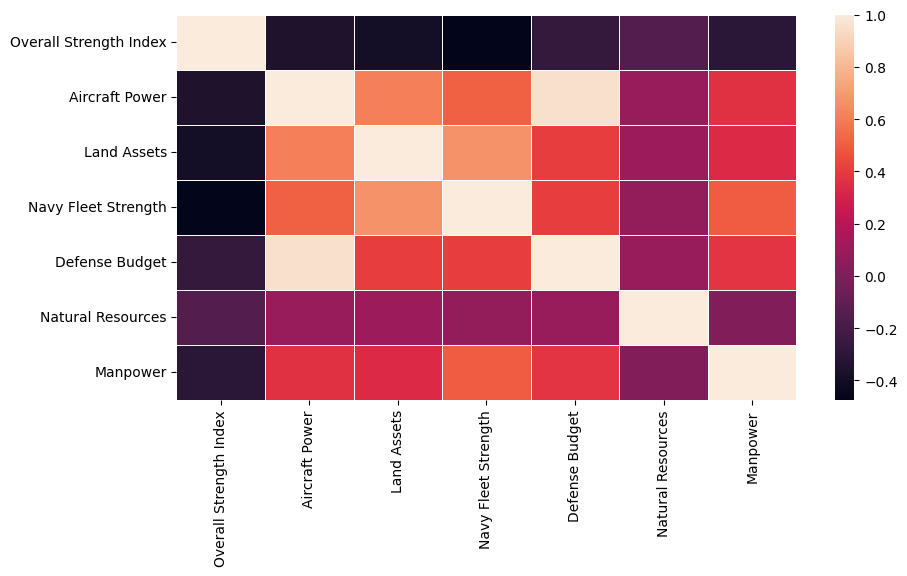

In [148]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=False,linewidth = 0.5)

In [149]:
X = df[['Aircraft Power', 'Land Assets', 'Navy Fleet Strength', 'Defense Budget', 'Natural Resources', 'Manpower']]
y = df['Overall Strength Index']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#create model
model = LinearRegression()
#train 
model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared 
r2 = r2_score(y_test, y_pred)
# Print 
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')



Mean Squared Error (MSE): 0.2298153115533305
R-squared (R2): -0.048154455554557885


In [153]:
X = df[['Overall Strength Index','Aircraft Power', 'Land Assets', 'Navy Fleet Strength']]
y = df['Defense Budget']
#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)
#create model
model = LinearRegression()
#train 
model.fit(X_train, y_train)
#predictions
y_pred = model.predict(X_test)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
# Calculate R-squared 
r2 = r2_score(y_test, y_pred)
# Print 
print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')


Mean Squared Error (MSE): 1.9132743297039477e+21
R-squared (R2): 0.8350479710106053


In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 93 entries, 0 to 96
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   2020 ranking            93 non-null     object 
 1   Overall Strength Index  93 non-null     float64
 2   Aircraft Power          93 non-null     float64
 3   Land Assets             93 non-null     float64
 4   Navy Fleet Strength     93 non-null     float64
 5   Defense Budget          93 non-null     float64
 6   Natural Resources       93 non-null     float64
 7   Manpower                93 non-null     float64
dtypes: float64(7), object(1)
memory usage: 6.5+ KB
